# **1. Perkenalan Dataset**

## **Sumber Dataset**
<p>
Dataset ini diperoleh dari Kaggle (public dataset).<br><br>
<b>Nama Dataset</b>: Student Performance Prediction<br>
<b>Link Dataset</b>: <a>https://www.kaggle.com/datasets/souradippal/student-performance-prediction</a>
</p>

## **Deskripsi**
<p>
Dataset ini berisi data akademik dan perilaku belajar mahasiswa yang digunakan untuk menganalisis serta memprediksi apakah seorang mahasiswa akan lulus (Pass) atau tidak lulus (Fail) dalam suatu mata kuliah.<br>
Informasi yang tersedia mencakup durasi belajar per minggu, tingkat kehadiran, nilai akademik sebelumnya, partisipasi dalam kegiatan ekstrakurikuler, serta tingkat pendidikan orang tua.
</p>

## **Informasi Umum**
- Jumlah data (baris): 40,000
- Jumlah fitur (kolom): 7
- Jenis analisis: Binary Classification (```Passed```: Yes = Pass; No = Fail)

## **Deskripsi Fitur**

 Nama Kolom                                        | Deskripsi 
 ------------------------------------------------- | --------- 
 ```Student ID```                                  | Identitas unik mahasiswa (string), tidak memiliki nilai prediktif
 ```Study Hours per Week```                        | Jumlah jam belajar mahasiswa per minggu
 ```Attendance Rate```                             | Persentase kehadiran mahasiswa dalam satu mata kuliah
 ```Previous Grades```                             | Nilai akademik mahasiswa pada mata kuliah sebelumnya
 ```Participation in Extracurricular Activities``` | Partisipasi dalam kegiatan ekstrakurikuler (Yes/No)
 ```Parent Education Level```                      | Tingkat pendidikan terakhir orang tua mahasiswa (Kategori)
 ```Passed```                                      | Target/label kelulusan mahasiswa (Yes = Pass, No = Fail)

# **2. Import Library**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

In [28]:
student_performance_prediction_raw_df = pd.read_csv('../student_performance_prediction_raw.csv')

In [29]:
student_performance_prediction_raw_df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [30]:
student_performance_prediction_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [31]:
student_performance_prediction_raw_df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


# **4. Exploratory Data Analysis**

## **a). Mengecek Missing Value**

In [32]:
student_performance_prediction_raw_df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

## **b). Visualisasi Distribusi Variabel Target (Passed)**
<p>
<b>Tujuan</b>: Memeriksa distribusi variabel target (Passed) guna memahami keseimbangan kelas dalam dataset. Langkah ini penting untuk mengidentifikasi apakah dataset seimbang atau tidak seimbang, yang dapat memengaruhi pelatihan dan evaluasi model pada tahap selanjutnya.<br><br>
<b>Interpretasi</b>: Bar graph menunjukkan bahwa jumlah siswa yang lulus dan tidak lulus relatif seimbang. Ini menunjukkan bahwa tidak ada ketidakseimbangan kelas yang signifikan pada variabel target, sehingga mengurangi risiko bias terhadap satu kelas selama pelatihan model.
</p>

In [33]:
student_performance_prediction_raw_df['Passed'].value_counts()

Passed
Yes    19011
No     18989
Name: count, dtype: int64

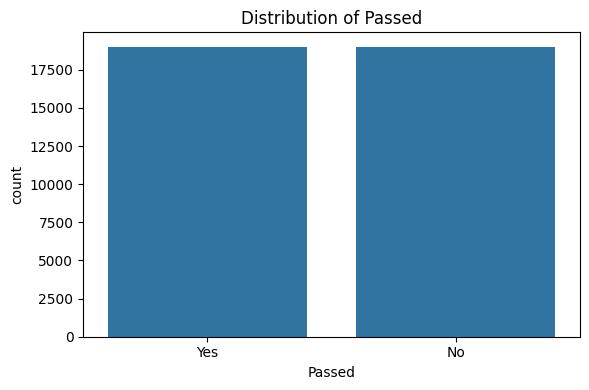

In [34]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Passed', data = student_performance_prediction_raw_df)
plt.title('Distribution of Passed')
plt.tight_layout()
plt.show()

## **c). Visualisasi Distribusi Fitur Numerik**
<p>
<b>Tujuan</b>: Mengeksplorasi distribusi fitur numerik, termasuk jam belajar per minggu, tingkat kehadiran, dan nilai sebelumnya. Memahami kecenderungan sentral, variabilitas, dan distribusi keseluruhan dari fitur-fitur ini membantu mengidentifikasi potensi skewness, nilai ekstrem, dan kebutuhan untuk penskalaan fitur sebelum pemodelan.<br><br>
<b>Interpretasi</b>: Histogram menunjukkan bahwa jam belajar per minggu sebagian besar berada pada rentang menengah, dengan hanya sedikit mahasiswa yang memiliki jam belajar sangat rendah atau sangat tinggi. Tingkat kehadiran cenderung terkonsentrasi pada nilai menengah hingga tinggi, yang menunjukkan bahwa mayoritas mahasiswa memiliki tingkat kehadiran yang cukup baik, meskipun terdapat beberapa nilai ekstrem. Nilai akademik sebelumnya juga terpusat pada rentang menengah dengan beberapa nilai yang jauh lebih rendah atau lebih tinggi. Pola ini menunjukkan bahwa fitur numerik memiliki distribusi yang cukup baik, namun mengandung outlier sehingga proses standarisasi atau normalisasi perlu dipertimbangkan pada tahap selanjutnya.
</p>

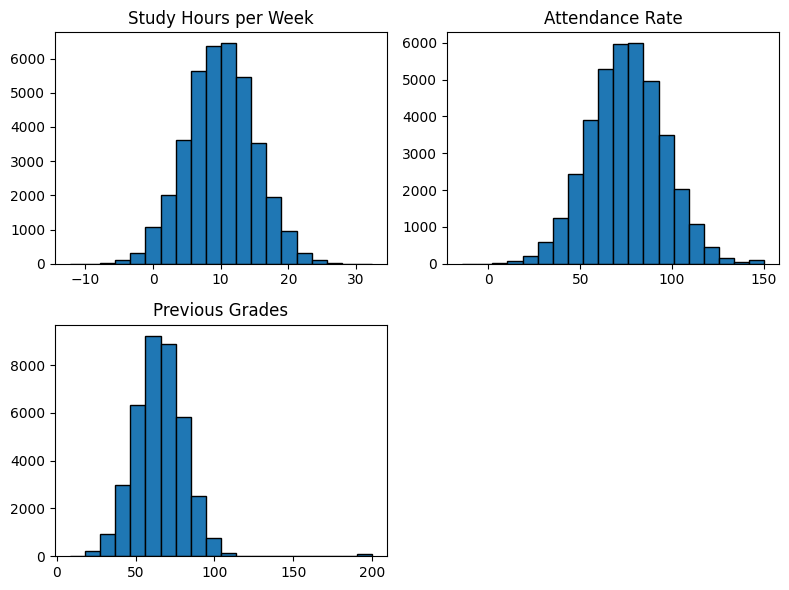

In [35]:
numeric_columns = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

student_performance_prediction_raw_df.hist(figsize = (8, 6), edgecolor = 'black', bins = 20, grid = False)
plt.tight_layout()
plt.show()

## **d). Visualisasi Distribusi Fitur Kategorikal**
<p>
<b>Tujuan</b>: Melihat distribusi fitur kategorikal, yaitu partisipasi dalam kegiatan ekstrakurikuler dan tingkat pendidikan orang tua. Tujuannya adalah untuk memastikan bahwa setiap kategori memiliki representasi yang memadai sebelum dilakukan proses encoding.<br><br>
<b>Interpretasi</b>: Diagram batang menunjukkan bahwa partisipasi dalam kegiatan ekstrakurikuler relatif seimbang antara mahasiswa yang mengikuti dan yang tidak mengikuti. Selain itu, tingkat pendidikan orang tua juga terdistribusi cukup merata di antara kategori yang tersedia. Hal ini menunjukkan bahwa fitur-fitur kategorikal memiliki variasi yang cukup dan layak untuk digunakan dalam proses pemodelan setelah dilakukan encoding.
</p>

In [36]:
student_performance_prediction_raw_df['Participation in Extracurricular Activities'].value_counts()

Participation in Extracurricular Activities
No     19028
Yes    18972
Name: count, dtype: int64

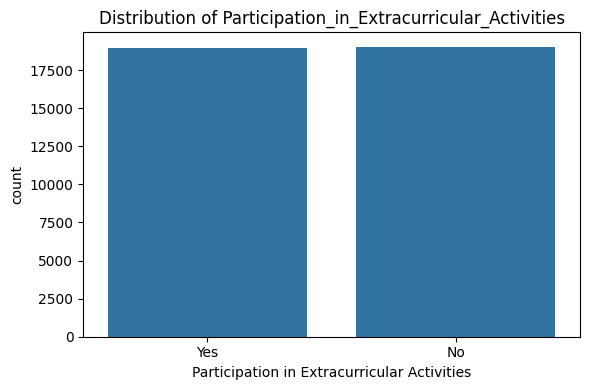

In [37]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Participation in Extracurricular Activities', data = student_performance_prediction_raw_df)
plt.title('Distribution of Participation_in_Extracurricular_Activities')
plt.tight_layout()
plt.show()

In [38]:
student_performance_prediction_raw_df['Parent Education Level'].value_counts()

Parent Education Level
Bachelor       7685
High School    7675
Doctorate      7610
Associate      7604
Master         7426
Name: count, dtype: int64

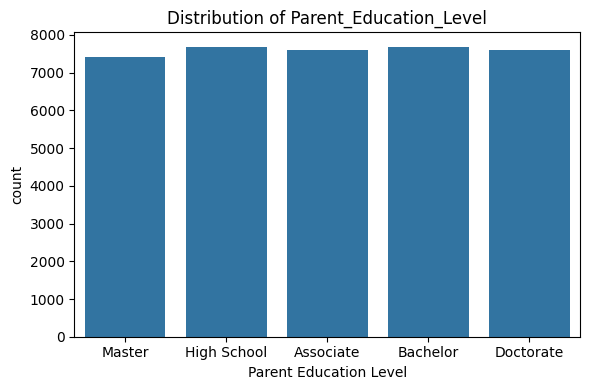

In [39]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Parent Education Level', data = student_performance_prediction_raw_df)
plt.title('Distribution of Parent_Education_Level')
plt.tight_layout()
plt.show()

## **e). Correlation Heatmap**
<p>
<b>Tujuan</b>: Mengamati hubungan antar fitur numerik serta mendeteksi potensi multikolinearitas. Pemahaman terhadap korelasi antar fitur penting untuk menghindari redundansi informasi dalam model machine learning.<br><br>
<b>Interpretasi</b>: Heatmap korelasi menunjukkan bahwa sebagian besar fitur numerik memiliki nilai korelasi yang sangat rendah satu sama lain. Tidak ditemukan hubungan linear yang kuat antar fitur, sehingga dapat disimpulkan bahwa multikolinearitas bukan merupakan masalah utama pada dataset ini dan seluruh fitur numerik dapat dipertahankan untuk tahap pemodelan.
</p>

In [40]:
student_performance_prediction_raw_df['Participation in Extracurricular Activities (Numerical)'] = student_performance_prediction_raw_df['Participation in Extracurricular Activities'].map({'Yes': 1, 'No': 0})
student_performance_prediction_raw_df['Parent Education Level (Numerical)'] = student_performance_prediction_raw_df['Parent Education Level'].map({'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4})

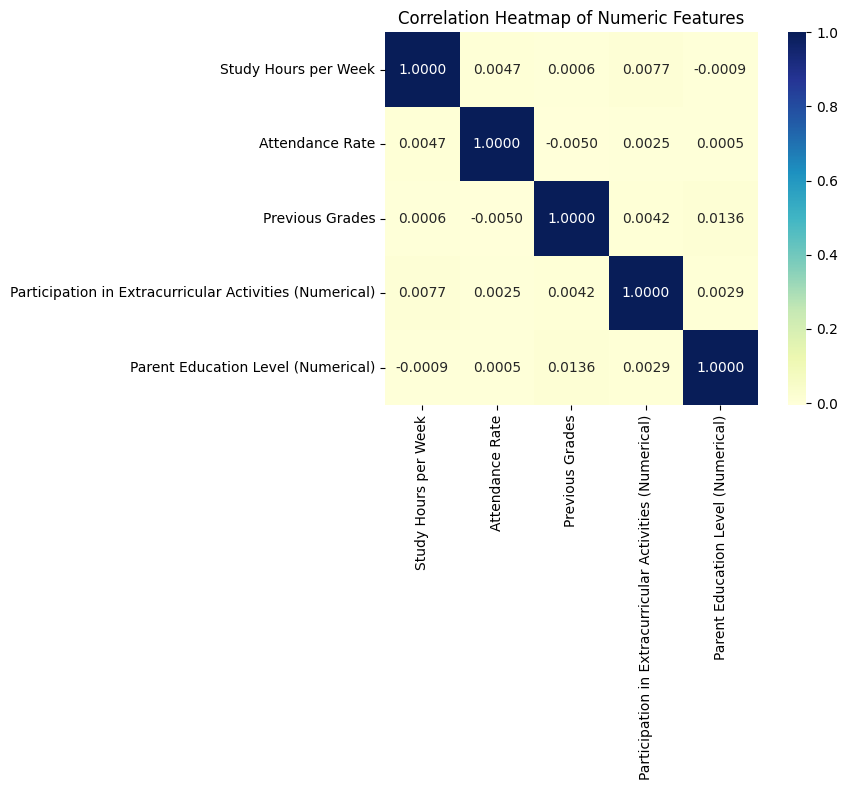

In [41]:
plt.figure(figsize = (10, 8))

correlation_matrix = student_performance_prediction_raw_df.select_dtypes(include = ['int64', 'float64']).corr()

sns.heatmap(correlation_matrix, annot = True, fmt = '.4f', cmap = 'YlGnBu', square = True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## **f). Boxplot**
<p>
<b>Tujuan</b>: Membandingkan distribusi fitur antara mahasiswa yang lulus dan yang tidak lulus. Boxplot digunakan untuk mengamati perbedaan nilai median, sebaran data, serta keberadaan outlier pada masing-masing kelompok.<br><br>
<b>Interpretasi</b>: Berdasarkan boxplot yang dihasilkan, distribusi jam belajar per minggu, tingkat kehadiran, dan nilai akademik sebelumnya menunjukkan median dan rentang interkuartil yang relatif serupa antara mahasiswa yang lulus dan tidak lulus. Meskipun terdapat outlier pada beberapa fitur, sebaran data antar kelompok menunjukkan tumpang tindih yang cukup besar. Selain itu, partisipasi dalam kegiatan ekstrakurikuler serta tingkat pendidikan orang tua juga memperlihatkan distribusi yang hampir sama pada kedua kelompok. Hal ini mengindikasikan bahwa tidak terdapat perbedaan yang sangat mencolok secara visual antara kelompok lulus dan tidak lulus pada tahap eksplorasi data ini.

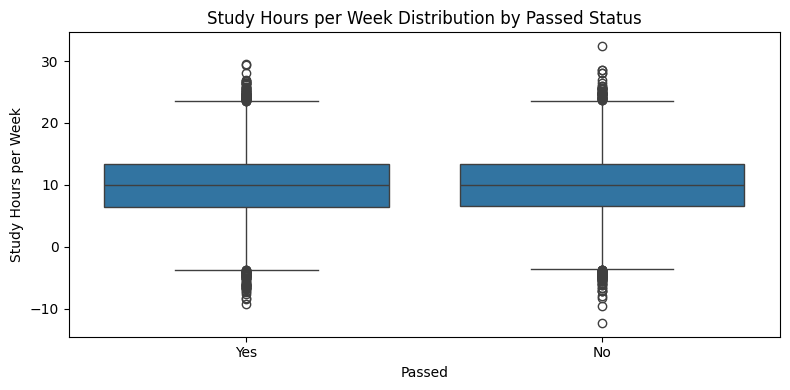

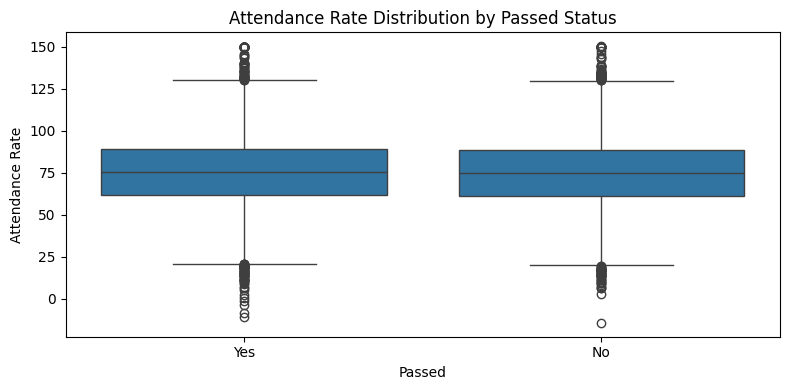

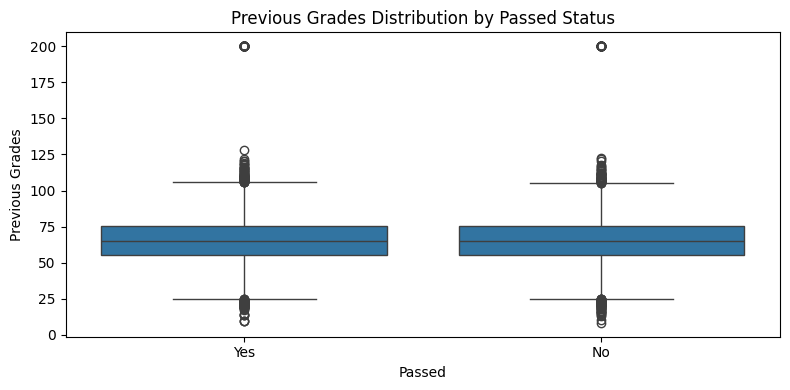

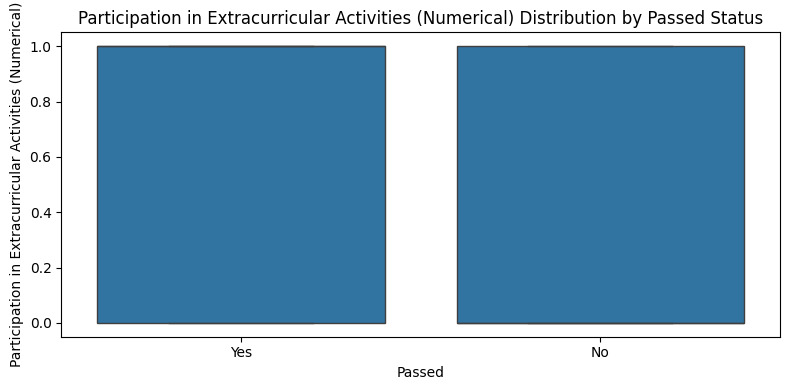

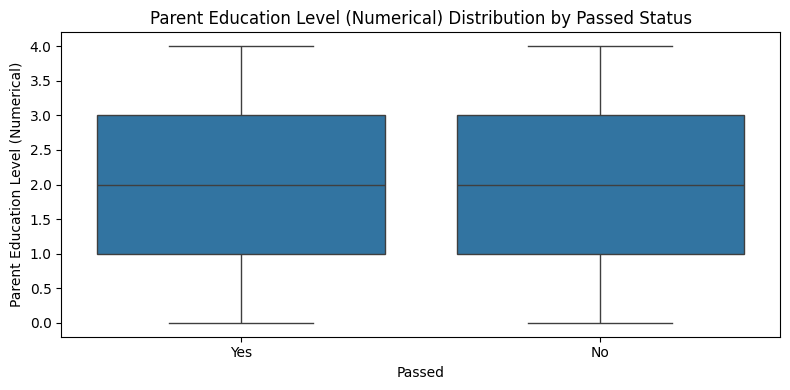

In [42]:
numeric_columns = [
    'Study Hours per Week', 
    'Attendance Rate',
    'Previous Grades', 
    'Participation in Extracurricular Activities (Numerical)', 
    'Parent Education Level (Numerical)'
]

for column in numeric_columns:
    plt.figure(figsize = (8, 4))
    sns.boxplot(x = 'Passed', y = column, data = student_performance_prediction_raw_df)
    plt.title(f"{column} Distribution by Passed Status")
    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

## **a). Pembersihan Awal Dataset (Kolom Tidak Relevan, Missing Values, dan Duplicates)**
<p>
<b>Tujuan</b>: Tahap ini bertujuan untuk melakukan pembersihan awal dataset dengan menghapus kolom yang tidak memiliki nilai prediktif terhadap target, seperti identitas mahasiswa, serta menangani permasalahan kualitas data berupa nilai kosong (missing values) dan data duplikat. Langkah ini dilakukan untuk memastikan bahwa dataset yang digunakan bersifat konsisten, relevan, dan bebas dari informasi yang tidak diperlukan, sehingga siap digunakan pada tahap analisis dan pemodelan selanjutnya.
</p>

In [43]:
student_performance_prediction_raw_df = student_performance_prediction_raw_df.drop(columns = ['Student ID', 'Participation in Extracurricular Activities (Numerical)', 'Parent Education Level (Numerical)'])
student_performance_prediction_raw_df = student_performance_prediction_raw_df.dropna()
student_performance_prediction_raw_df = student_performance_prediction_raw_df.drop_duplicates()

student_performance_prediction_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29446 entries, 1 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         29446 non-null  float64
 1   Attendance Rate                              29446 non-null  float64
 2   Previous Grades                              29446 non-null  float64
 3   Participation in Extracurricular Activities  29446 non-null  object 
 4   Parent Education Level                       29446 non-null  object 
 5   Passed                                       29446 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.6+ MB


## **b). Encoding Variabel Target dan Fitur Kategorikal Biner**
<p>
<b>Tujuan</b>: Tahap ini bertujuan untuk mengubah variabel target dan fitur kategorikal biner ke dalam bentuk numerik agar dapat diproses oleh algoritma machine learning. Encoding dilakukan dengan pemetaan nilai kategorikal ke representasi numerik yang sesuai.
</p>

In [44]:
student_performance_prediction_raw_df['Passed'] = student_performance_prediction_raw_df['Passed'].map({'No': 0, 'Yes': 1})
student_performance_prediction_raw_df['Participation in Extracurricular Activities'] = student_performance_prediction_raw_df['Participation in Extracurricular Activities'].map({'No': 0, 'Yes': 1})

## **c). One-Hot Encoding Fitur Kategorikal Multikelas**
<p>
<b>Tujuan</b>: Tahap ini bertujuan untuk mengubah fitur kategorikal multikelas menjadi representasi boolean menggunakan metode one-hot encoding. Proses ini memungkinkan model machine learning memanfaatkan informasi kategorikal tanpa mengasumsikan hubungan ordinal antar kategori.
</p>

In [45]:
student_performance_prediction_raw_df = pd.get_dummies(student_performance_prediction_raw_df, columns = ['Parent Education Level'], drop_first = True)

## **d). Penanganan Nilai Tidak Valid dan Nilai Tidak Realistis**
<p>
<b>Tujuan</b>: Tahap ini bertujuan untuk menghapus data yang mengandung nilai tidak realistis atau tidak mungkin secara logis, seperti nilai negatif atau nilai di luar rentang yang wajar. Langkah ini dilakukan untuk meningkatkan validitas dan keandalan dataset.
</p>

In [46]:
student_performance_prediction_raw_df = student_performance_prediction_raw_df[
    (student_performance_prediction_raw_df['Study Hours per Week'] >= 0) &
    (student_performance_prediction_raw_df['Attendance Rate'].between(0, 100)) &
    (student_performance_prediction_raw_df['Previous Grades'].between(0, 100))
]

student_performance_prediction_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25249 entries, 1 to 39999
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         25249 non-null  float64
 1   Attendance Rate                              25249 non-null  float64
 2   Previous Grades                              25249 non-null  float64
 3   Participation in Extracurricular Activities  25249 non-null  int64  
 4   Passed                                       25249 non-null  int64  
 5   Parent Education Level_Bachelor              25249 non-null  bool   
 6   Parent Education Level_Doctorate             25249 non-null  bool   
 7   Parent Education Level_High School           25249 non-null  bool   
 8   Parent Education Level_Master                25249 non-null  bool   
dtypes: bool(4), float64(3), int64(2)
memory usage: 1.3 MB


In [47]:
student_performance_prediction_raw_df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Passed
count,25249.000000,25249.000000,25249.000000,25249.000000,25249.000000
mean,10.249947,71.007862,64.678910,0.500059,0.496455
std,4.706202,16.799869,14.538508,0.500010,0.499997
min,-0.000000,0.500000,8.300000,0.000000,0.000000
25%,6.900000,59.800000,54.800000,0.000000,0.000000
50%,10.100000,72.500000,65.000000,1.000000,0.000000
75%,13.400000,84.000000,74.700000,1.000000,1.000000
max,32.400000,100.000000,100.000000,1.000000,1.000000


## **e). Penanganan Outlier dengan Metode IQR**
<p>
<b>Tujuan</b>: Tahap ini bertujuan untuk mengurangi pengaruh nilai ekstrem yang menyimpang secara statistik dari sebagian besar data. Metode Interquartile Range (IQR) diterapkan secara selektif pada fitur numerik utama untuk menjaga distribusi data yang lebih stabil tanpa menghilangkan terlalu banyak informasi.
</p>

In [48]:
numeric_columns = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

for column in numeric_columns:
    Q1 = student_performance_prediction_raw_df[column].quantile(0.25)
    Q3 = student_performance_prediction_raw_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    student_performance_prediction_raw_df = student_performance_prediction_raw_df[
        (student_performance_prediction_raw_df[column] >= lower_bound) &
        (student_performance_prediction_raw_df[column] <= upper_bound)
    ]

student_performance_prediction_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24912 entries, 1 to 39999
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         24912 non-null  float64
 1   Attendance Rate                              24912 non-null  float64
 2   Previous Grades                              24912 non-null  float64
 3   Participation in Extracurricular Activities  24912 non-null  int64  
 4   Passed                                       24912 non-null  int64  
 5   Parent Education Level_Bachelor              24912 non-null  bool   
 6   Parent Education Level_Doctorate             24912 non-null  bool   
 7   Parent Education Level_High School           24912 non-null  bool   
 8   Parent Education Level_Master                24912 non-null  bool   
dtypes: bool(4), float64(3), int64(2)
memory usage: 1.2 MB


## **f). Standardisasi Fitur Numerik**
<p>
<b>Tujuan</b>: Tahap ini bertujuan untuk menstandarisasi fitur numerik sehingga memiliki skala yang sebanding. Standardisasi dilakukan untuk memastikan bahwa perbedaan skala antar fitur tidak mendominasi proses pemodelan, tanpa melibatkan pelatihan atau evaluasi model pada tahap ini.
</p>

In [49]:
standard_scaler = StandardScaler()
student_performance_prediction_raw_df[numeric_columns] = standard_scaler.fit_transform(student_performance_prediction_raw_df[numeric_columns])

student_performance_prediction_raw_df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Passed,Parent Education Level_Bachelor,Parent Education Level_Doctorate,Parent Education Level_High School,Parent Education Level_Master
1,-0.191808,1.466186,-0.295106,0,0,False,False,True,False
3,1.604856,0.335262,-0.169485,1,0,True,False,False,False
4,-0.300041,1.099400,0.549348,0,0,False,False,False,True
5,-0.300041,0.151869,0.312064,1,1,False,False,True,False
6,1.669795,-1.999944,2.007951,0,1,False,True,False,False


In [50]:
student_performance_prediction_raw_df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Passed
count,2.491200e+04,2.491200e+04,2.491200e+04,24912.000000,24912.000000
mean,7.073483e-17,3.766344e-16,1.796893e-16,0.499558,0.496508
std,1.000020e+00,1.000020e+00,1.000020e+00,0.500010,0.499998
min,-2.204937e+00,-2.910796e+00,-2.772638e+00,0.000000,0.000000
25%,-7.329719e-01,-6.856261e-01,-6.859279e-01,0.000000,0.000000
50%,-1.863574e-02,8.462497e-02,1.196834e-02,0.000000,0.000000
75%,6.957005e-01,7.754057e-01,6.959066e-01,1.000000,1.000000
max,2.795416e+00,1.753502e+00,2.454605e+00,1.000000,1.000000


## **g). Pemisahan Fitur dan Target**
<p>
<b>Tujuan</b>: Tahap ini bertujuan untuk memisahkan dataset menjadi fitur (X) dan variabel target (y) guna memperjelas struktur data yang akan digunakan pada tahap pemodelan machine learning selanjutnya.
</p>

In [51]:
X = student_performance_prediction_raw_df.drop(columns = ['Passed'])
y = student_performance_prediction_raw_df['Passed']

# **6. Menyimpan Dataset yang Telah Diproses**

In [52]:
student_performance_prediction_raw_df.to_csv('student_performance_prediction_preprocessing.csv', index = False)